## Part 3: Heptagon Rotations

In [Part 1](https://nbviewer.org/github/vorth/ipython/blob/master/heptagons/HeptagonNumbers.ipynb) and [Part 2](https://nbviewer.org/github/vorth/ipython/blob/master/heptagons/DrawingTheHeptagon.ipynb) we saw how we can represent and render these two figures, using a special kind of number that is custom made for creating figures with the symmetries and proportions of a heptagon.  Now, we will explore how we can encode the symmetry in a rotation function, and we'll use that function to generate the vertices for the right-hand figure, the "nautilus shell".

<img src="heptagonSampler.png" width=1100 height=600 />

### Deriving the Rotation Function

One of the defining characteristics of the regular heptagon is its order-7 rotational symmetry.  A side-effect of our use of a natural coordinate frame for the heptagon vertices is that our vertices no longer lie on a circle, in that coordinate frame.  However, it turns out that we can still encode a "rotation" function that maps each vertex to the next.  We don't need any Trigonometry to do this; just a simple trick from Linear Algebra.

The way to derive such a mapping function involves setting up a pair of equations that relate "input" vectors to "output" vectors, and solving those equations.  It sounds difficult, but with a clever choice of input vectors, it is very simple.

Looking at our heptagon, we can define our mapping in terms of any of the three kinds of diagonals.  Let's try it using the longest diagonals, the blue ones.  The trick to setting up easy equations is to work with vectors that have either a zero X-component or a zero Y-component.  For that reason, we'll start with the P2-P6 diagonal as our first input, and derive the mapping that takes it to the P3-P0 diagonal.

<img src="heptagonRotationMapping.png" width=500 height=400/>

As we saw in [Part 2](http://nbviewer.jupyter.org/github/vorth/ipython/blob/master/heptagons/DrawingTheHeptagon.ipynb), a 2-dimensional linear transformation can be written down as a pair of equations:

$$ x' = r x + t y $$

$$ y' = s x + u y $$

We wish to derive the values for $r$, $s$, $t$, and $u$.  We can do this by plugging in our chosen input vector as $(x,y)$, and our output vector as $(x',y')$:

$$ \sigma = r \sigma^2 + 0 $$

$$ \rho\sigma = s \sigma^2 + 0 $$

Since our input vector had zero as a $y$ coordinate, these two equations are trivial to solve, giving us the values for $r$ and $s$.  We can simplify by appling the identities from [Part 1](http://nbviewer.ipython.org/github/vorth/ipython/blob/master/heptagons/HeptagonNumbers.ipynb):

$$ r = \frac{1}{\sigma} = \sigma-\rho $$

$$ s = \frac{\rho}{\sigma} = \rho-1 $$

To find $u$ and $t$, we can start with the P4-P0 diagonal as our input vector, which will have a zero $x$ coordinate, and map it to P5-P1 as the output:

$$ -\rho\sigma = 0 + t \sigma^2 $$

$$ \rho\sigma = 0 + u \sigma $$

$$ t = -\frac{\rho}{\sigma} = 1-\rho $$

$$ u = \frac{\rho}{\sigma} = \rho-1 $$

If you prefer to think in terms of matrices, here is the transformation matrix we have derived:

$$
\begin{bmatrix}
   \sigma-\rho & 1-\rho
\\ \rho-1      & \rho-1
\end{bmatrix} =
\begin{bmatrix}
   \frac{1}{\sigma}    & \frac{-\sigma}{\rho}
\\ \frac{\sigma}{\rho} & \frac{\sigma}{\rho} 
\end{bmatrix}
$$

Now we can write our rotate function, which takes a vector as a 2-tuple, and produces another 2-tuple.  While we're at it, we'll write simple functions for adding vectors and scaling them.


In [1]:
# load the definitions from the previous notebooks
%run DrawingTheHeptagon.py

r = sigma-rho
s = rho-1
t = one-rho # the __sub__ function requires a HeptagonNumber on the left, so "1-rho" won't work
u = rho-1

def rotate(v) :
    x, y = v
    return ( r*x + t*y, s*x + u*y )

def plusv( v1, v2 ) :
    h1, h2 = v1
    h3, h4 = v2
    return ( h1+h3, h2+h4 )

def scale( s, v ) :
    x, y = v
    return ( x*s, y*s )


### Applying the Rotation

Let's try out our function, using it to derive the heptagon edges from the P1-P0 edge, and drawing the result, using the original "render" function that does not correct for the skewed coordinate frame:


Populating the interactive namespace from numpy and matplotlib


(-0.5, 5.5)

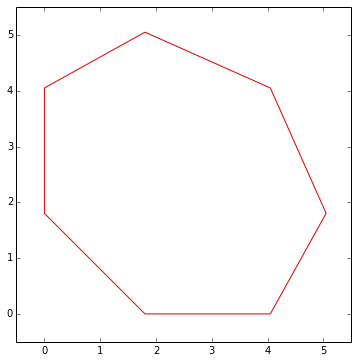

In [2]:
p0p1 = ( sigma, zero )
p0 = ( rho, zero )

def heptagonVerts(v,e):
    result = []
    vi = v
    ei = e
    for i in range(7):
        result .append( vi )
        vi = plusv( vi, ei )
        ei = rotate( ei )
    return result

rotationHeptagon = heptagonVerts( p0, p0p1 )

%pylab inline

fig = matplotlib.pyplot.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.add_patch( drawPolygon( rotationHeptagon,'#dd0000', render ) )
ax.set_xlim(-0.5,5.5)
ax.set_ylim(-0.5,5.5)


Clearly our rotation function generates the same heptagon vertices as those we derived manually in [Part 2](http://nbviewer.jupyter.org/github/vorth/ipython/blob/master/heptagons/DrawingTheHeptagon.ipynb)!

Perhaps we should not be surprised, but think about what we've produced here: a "rotation" function that is not circular!  We have modeled a mapping that moves a point roughly a seventh of the way around an elliptical path.  Even if you've been through a linear algebra course, or a mechanics course, or any other engineering-oriented introduction to matrices, it is a safe bet that the course focused almost entirely on *orthogonal* transformations, as are used to model rigid body motions, and so you may be as pleased and surprised that this works as I was.  My mathematics professors won't be pleased that I was surprised, of course, since we really haven't done anything remarkable here at all; we've simply used basic linear algebra in a way seldom illustrated.

Another point that bears mentioning here is the benefit we get from using integer-based heptagon number.  We can iterate our rotation function as many times as we like, and we'll never see any drift or error in the results, as we eventually would if we used floating point numbers.  The function is an exact implementation of cyclic operation of order seven, and we can see this if we just print out the values for few iterations:


In [3]:
v = p0p1
for i in range( 22 ):
    v = rotate( v )
    x,y = v
    print( str(x) + ", " + str(y) )


1, ρ
-1, σ
-1σ, 1
-1ρ, -1
0, -1σ
ρ, -1ρ
σ, 0
1, ρ
-1, σ
-1σ, 1
-1ρ, -1
0, -1σ
ρ, -1ρ
σ, 0
1, ρ
-1, σ
-1σ, 1
-1ρ, -1
0, -1σ
ρ, -1ρ
σ, 0
1, ρ


### Combining Scaling and Rotation

Scaling with heptagon number works the same way, of course, benefiting from exact integer arithmetic.  Now that we have all the necessary ideas in hand, we can combine scaling and rotation to produce the "nautilus shell" figure shown above.

We'll start with triangle $\triangle P2P4P6$ from the heptagon, then scale by a factor of $\frac{\rho}{\sigma} = \rho-1$, and apply our rotation.

(-3.0, 6.0, -2.0, 4.0)

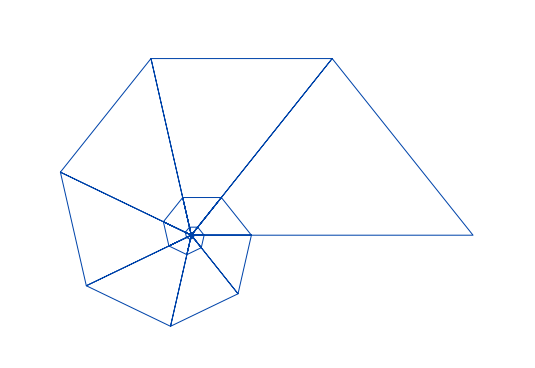

In [9]:

origin = ( zero, zero )

def nautilus( n ):
    result = []
    def shrink(v):
        return scale( rho_over_sigma, v )
    p1 = ( sigma*sigma, zero )
    p2 = ( rho, rho*rho )
    for i in range(n):
        result .append( origin )
        result .append( p1 )
        result .append( p2 )
        p1 = p2
        p2 = rotate( shrink( p2 ) )
    return result

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
ax.add_patch( drawPolygon( nautilus( 22 ), '#0044aa', skewRender ) )
ax.set_xlim(-3,6)
ax.set_ylim(-2,4)
ax.axis('off')



### Drawing the Nested Heptagrams

For good measure, I'm including the code used to render the other figure shown at the top.  Although this could be done recursively, with computed intersections for the nested vertices, I've just done manual computation.

(-2.0, 4.0, -0.5, 5.5)

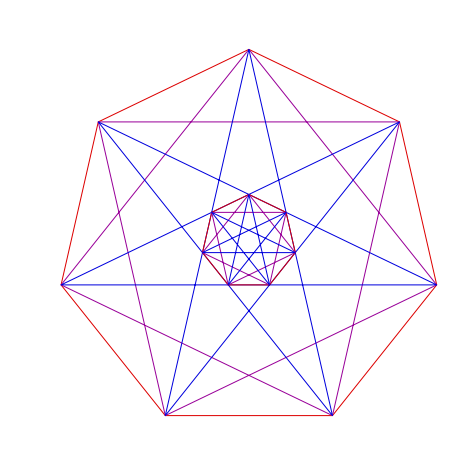

In [10]:

def ngonPath( edge, n, skip=1, start=origin ):
    result = []
    vi = plusv( start, edge )
    for i in range(n):
        result .append( vi )
        for j in range(skip):
            edge = rotate( edge )
        vi = plusv( vi, edge )
    return result

one_edge = ( sigma, zero )
heptagon_path = ngonPath( one_edge, 7 )

rho_edge = plusv( one_edge, rotate( one_edge ) )
heptagram_rho_path = ngonPath( rho_edge, 7, 2 )

sigma_edge = ( zero, sigma+rho+1 )
heptagram_sigma_path = ngonPath( sigma_edge, 7, 4 )

inner_origin = ( sigma-rho, rho )
small_edge = ( rho_inv, zero )
small_rho_edge = plusv( small_edge, rotate( small_edge ) )
small_sigma_edge = ( zero, HeptagonNumber(-1,0,1) )

heptagon_path_shrunk = ngonPath( small_edge, 7, 1, inner_origin )

heptagram_rho_path_shrunk = ngonPath( small_rho_edge, 7, 2, inner_origin )

heptagram_sigma_path_shrunk = ngonPath( small_sigma_edge, 7, 4, inner_origin )

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.add_patch( drawPolygon( heptagon_path,'#dd0000', skewRender ) )
ax.add_patch( drawPolygon( heptagram_rho_path,'#990099', skewRender ) )
ax.add_patch( drawPolygon( heptagram_sigma_path,'#0000dd', skewRender ) )
ax.add_patch( drawPolygon( heptagon_path_shrunk,'#dd0000', skewRender ) )
ax.add_patch( drawPolygon( heptagram_rho_path_shrunk,'#990099', skewRender ) )
ax.add_patch( drawPolygon( heptagram_sigma_path_shrunk,'#0000dd', skewRender ) )
ax.set_xlim(-2,4)
ax.set_ylim(-0.5,5.5)
ax.axis('off')

### Conclusion

This three part article has demonstrated how heptagon numbers can be used to represent very rich geometry, while relying on exact integer arithmetic.  Heptagon numbers are far from unique in this regard!  Any regular N-gon generates a corresponding field of numbers, just as we explored in Part 1.  The same ideas apply in three or more dimensions, also, where we find beauties like the "golden field", which can represent icosahedral symmetry and quasicrystals.

The story does not end there, either!  There is an infinite number of "algebraic extensions" of the integers or rationals, with graphical applications we can barely imagine.